## Q2. (40 points) Without using any third-party libraries or toolboxes, write code to

(a) generate a random instance of the frozen lake scenario given two inputs - the size of the lake (N) assuming its square, and the number of holes (M).

(b) implement a Q-learning agent to find a path through the lake to the goal. Report the results of the learning algorithm by plotting episode count on the x-axis and total reward received by the agent within an episode on the y-axis 

(c) identify how learning performance changes when you change the parameters α and λ in your algorithm

(d) identify how learning performance changes with respect to changes in N and M. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class FrozenLake:
    def __init__(self, grid_size, hole_count):
        dim = int(np.sqrt(grid_size))
        holes = np.random.choice(range(1, grid_size - 1), hole_count, replace=False)
        
        self.grid = np.ones((dim, dim))
        rewards = np.zeros((dim, dim))
        
        for h in holes:
            x, y = divmod(h, dim)
            rewards[x, y] = -100
            self.grid[x, y] = 0
            
        rewards[-1, -1] = 100
        self.grid[0, 0] += 80
        
        self.reward_matrix = rewards
        self.current_pos = [0, 0]
        self.is_complete = False
        self.dim = dim

    def reset(self):
        self.grid[self.current_pos[0], self.current_pos[1]] %= 80
        self.current_pos = [0, 0]
        self.is_complete = False
        self.grid[0, 0] += 80
        return 0
    
    def move(self, action):
        # Action Mapping: 0 = Up, 1 = Right, 2 = Down, 3 = Left
        self.grid[self.current_pos[0], self.current_pos[1]] %= 80

        if action == 0:
            self.current_pos[0] -= 1
        elif action == 1:
            self.current_pos[1] += 1
        elif action == 2:
            self.current_pos[0] += 1
        elif action == 3:
            self.current_pos[1] -= 1

        state_id = self.dim * self.current_pos[0] + self.current_pos[1]
        reward = self.reward_matrix[self.current_pos[0], self.current_pos[1]]
        
        if state_id == (self.dim * self.dim - 1):
            self.is_complete = True

        self.grid[self.current_pos[0], self.current_pos[1]] += 80
        return state_id, reward, self.is_complete
    
    def random_action(self):
        if self.current_pos[0] == 0:
            if self.current_pos[1] == 0:
                return np.random.randint(1, 3)
            elif self.current_pos[1] == self.dim - 1:
                return np.random.randint(2, 4)
            else:
                return np.random.randint(1, 4)
        elif self.current_pos[0] == self.dim - 1:
            if self.current_pos[1] == 0:
                return np.random.randint(0, 2)
            elif self.current_pos[1] == self.dim - 1:
                return np.random.choice([0, 3])
            else:
                return np.random.choice([0, 1, 3])
        elif self.current_pos[1] == 0:
            return np.random.randint(0, 3)
        elif self.current_pos[1] == self.dim - 1:
            return np.random.choice([0, 2, 3])
        else:
            return np.random.randint(0, 4)
        
    def show(self):
        print(self.grid)


In [11]:
grid_size = int(input("Grid size: "))
holes = int(input("Number of holes: "))
env = FrozenLake(grid_size, holes)
env.show()


[[81.  0.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 0.  1.  0.  1.  1.]
 [ 1.  1.  0.  1.  1.]]


In [12]:
Q_table = np.zeros((grid_size, 4))
dim = int(np.sqrt(grid_size))

for i in range(dim):
    Q_table[i][0] = -1e8
    Q_table[dim*(dim-1) + i][2] = -1e8
    
for j in range(dim):
    Q_table[dim*j][3] = -1e8
    Q_table[dim*j + dim-1][1] = -1e8


In [13]:
episodes = 3000
learning_rate = 0.8
discount = 0.8
max_steps = dim * dim * 3

reward_list = []

for ep in range(episodes):
    state = env.reset()
    total_reward = 0
    
    for step in range(max_steps):
        exploration_prob = np.random.rand()
        
        if exploration_prob > np.exp(-ep * 5e-4):
            action = np.argmax(Q_table[state, :])
        else:
            action = env.random_action()

        new_state, reward, finished = env.move(action)

        Q_table[state, action] = Q_table[state, action] + learning_rate * (reward + discount * np.max(Q_table[new_state, :]) - Q_table[state, action])
        total_reward += reward
        state = new_state
        
        if finished:
            break

    reward_list.append(total_reward)


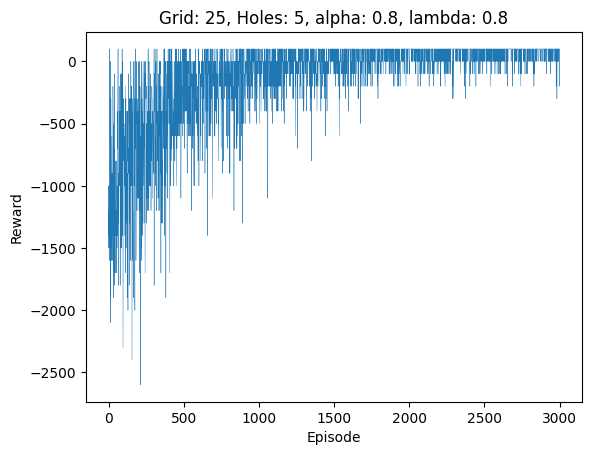

In [14]:
plt.plot(reward_list, linewidth=0.3)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f'Grid: {grid_size}, Holes: {holes}, alpha: {learning_rate}, lambda: {discount}')
plt.show()


In [15]:
state = env.reset()
steps = 0

while True:
    steps += 1
    action = np.argmax(Q_table[state, :])
    state, reward, finished = env.move(action)
    
    print(f'Step {steps}, Action: {action}')
    env.show()
    
    if finished or steps > max_steps:
        break

if steps > max_steps:
    print('Failed to find a solution.')


Step 1, Action: 2
[[ 1.  0.  1.  1.  0.]
 [81.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 0.  1.  0.  1.  1.]
 [ 1.  1.  0.  1.  1.]]
Step 2, Action: 1
[[ 1.  0.  1.  1.  0.]
 [ 1. 81.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 0.  1.  0.  1.  1.]
 [ 1.  1.  0.  1.  1.]]
Step 3, Action: 1
[[ 1.  0.  1.  1.  0.]
 [ 1.  1. 81.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 0.  1.  0.  1.  1.]
 [ 1.  1.  0.  1.  1.]]
Step 4, Action: 1
[[ 1.  0.  1.  1.  0.]
 [ 1.  1.  1. 81.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 0.  1.  0.  1.  1.]
 [ 1.  1.  0.  1.  1.]]
Step 5, Action: 1
[[ 1.  0.  1.  1.  0.]
 [ 1.  1.  1.  1. 81.]
 [ 1.  1.  1.  1.  1.]
 [ 0.  1.  0.  1.  1.]
 [ 1.  1.  0.  1.  1.]]
Step 6, Action: 2
[[ 1.  0.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1. 81.]
 [ 0.  1.  0.  1.  1.]
 [ 1.  1.  0.  1.  1.]]
Step 7, Action: 2
[[ 1.  0.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 0.  1.  0.  1. 81.]
 [ 1.  1.  0.  1.  1.]]
Step 8, Action: 2
[[ 1.  0.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.

## Some Observations

1. As alpha increases, the overall performance improves; however, a slight drop in efficiency is observed when alpha approaches 1.
2. When lambda is between 0 and 1, minimal learning occurs. The model performs optimally at a moderate lambda value.
3. Higher values of "Grid Size" contribute to improved performance, indicating that "Grid Size" positively impacts learning.
4. A reduction in "Holes" results in poorer performance, suggesting that higher "Holes" values are essential for maintaining performance levels.